In [75]:
import pandas as pd
import numpy as np
import nltk 
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/joern/nltk_data...


In [62]:
f = open('chat.txt', "r")
lines = f.read().splitlines() 
# lines = list(f)

In [120]:
formatted_lines = list(map(lambda x: x.replace(' - ', ': ').split(': ',2),lines))

In [63]:
# print(lines[0])

# formatted_lines = list(map(lambda x: x.split(' - ', 1),lines))

# for line in formatted_lines:
#     line[1] = line[1].split(': ', 1)

# print(formatted_lines[0])

# for line in formatted_lines:
#     line.append(line[1][1])
#     line[1] = line[1][0]

# print(formatted_lines[0])

11/13/18, 12:44 PM - Joe: <Media omitted>
['11/13/18, 12:44 PM', ['Joe', '<Media omitted>']]
['11/13/18, 12:44 PM', 'Joe', '<Media omitted>']


In [121]:
df = pd.DataFrame(formatted_lines)
df.columns = ['timestamp','name','message']
df.head()

,timestamp,name,message
0,"11/13/18, 12:44 PM",Joe,<Media omitted>
1,"11/13/18, 12:44 PM",Joe,Can you please show your mentor this picture
2,"11/13/18, 12:45 PM",Joe,And don't say any words
3,"11/13/18, 12:45 PM",Joe,Just keep pointing at this picture
4,"11/13/18, 1:50 PM",Sarah Cook,Is that the rose


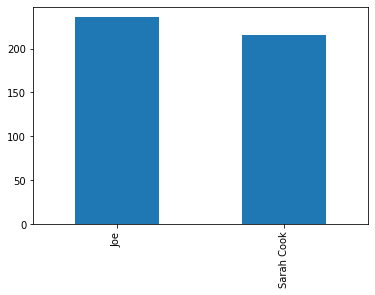

In [122]:
pd.value_counts(df['name']).plot.bar()

In [81]:
sid = SentimentIntensityAnalyzer()
ss = sid.polarity_scores(df['message'][0])
df['neg'] = df['message'].apply(lambda x: sid.polarity_scores(x)['neg'])
df['neu'] = df['message'].apply(lambda x: sid.polarity_scores(x)['neu'])
df['pos'] = df['message'].apply(lambda x: sid.polarity_scores(x)['pos'])
df['compound'] = df['message'].apply(lambda x: sid.polarity_scores(x)['compound'])
df.head()

,timestamp,name,message,neg,neu,pos,compound
0,"11/13/18, 12:44 PM",Joe,<Media omitted>,0.0,1.000,0.000,0.0000
1,"11/13/18, 12:44 PM",Joe,Can you please show your mentor this picture,0.0,0.753,0.247,0.3182
2,"11/13/18, 12:45 PM",Joe,And don't say any words,0.0,1.000,0.000,0.0000
3,"11/13/18, 12:45 PM",Joe,Just keep pointing at this picture,0.0,1.000,0.000,0.0000
4,"11/13/18, 1:50 PM",Sarah Cook,Is that the rose,0.0,1.000,0.000,0.0000


In [87]:
df.sort_values(by=['neg'],ascending=False).head(10)

,timestamp,name,message,neg,neu,pos,compound
187,"9/24/19, 10:23 AM",Joe,Fuck,1.000,0.000,0.0,-0.5423
115,"9/24/19, 9:44 AM",Sarah Cook,ill,1.000,0.000,0.0,-0.4215
395,"9/24/19, 9:23 PM",Joe,Sorry,1.000,0.000,0.0,-0.0772
35,"11/13/18, 7:22 PM",Joe,:(,1.000,0.000,0.0,-0.4404
114,"9/24/19, 9:44 AM",Sarah Cook,Ill,1.000,0.000,0.0,-0.4215
203,"9/24/19, 10:42 AM",Sarah Cook,damn,1.000,0.000,0.0,-0.4019
316,"9/24/19, 8:30 PM",Sarah Cook,no.,1.000,0.000,0.0,-0.2960
385,"9/24/19, 9:22 PM",Sarah Cook,Stop pressuring me,0.821,0.179,0.0,-0.5574
182,"9/24/19, 10:18 AM",Sarah Cook,I hate VR,0.787,0.213,0.0,-0.5719
246,"9/24/19, 5:09 PM",Sarah Cook,Looks shit,0.783,0.217,0.0,-0.5574


In [88]:
df.sort_values(by=['pos'],ascending=False).head(10)

,timestamp,name,message,neg,neu,pos,compound
207,"9/24/19, 10:43 AM",Joe,Haha,0.0,0.0,1.0,0.4588
210,"9/24/19, 10:44 AM",Sarah Cook,Yeah,0.0,0.0,1.0,0.2960
104,"9/24/19, 9:43 AM",Sarah Cook,Yeah,0.0,0.0,1.0,0.2960
103,"9/24/19, 9:42 AM",Joe,Wow,0.0,0.0,1.0,0.5859
238,"9/24/19, 5:05 PM",Joe,Yay!,0.0,0.0,1.0,0.5707
329,"9/24/19, 9:06 PM",Sarah Cook,Yeah,0.0,0.0,1.0,0.2960
58,"11/14/18, 10:18 AM",Joe,Wow,0.0,0.0,1.0,0.5859
154,"9/24/19, 9:49 AM",Sarah Cook,Cute,0.0,0.0,1.0,0.4588
173,"9/24/19, 9:55 AM",Sarah Cook,Thanks,0.0,0.0,1.0,0.4404
201,"9/24/19, 10:42 AM",Sarah Cook,Good,0.0,0.0,1.0,0.4404


In [116]:
# frequency count
pd.Series(' '.join(df.message).split()).value_counts()

I                84
you              69
the              66
to               66
a                60
me               32
and              30
it               28
for              27
that             27
is               25
my               24
in               21
Yeah             19
on               19
omitted>         19
<Media           19
so               18
of               18
do               17
be               17
I’m              16
with             15
can              15
not              14
we               14
but              13
just             13
was              13
have             12
                 ..
shows             1
pointing          1
probs             1
redundancies,     1
floor             1
lil               1
oil               1
also              1
after             1
stop              1
edits             1
housemate         1
found             1
mini              1
could             1
advice            1
somewhere,        1
remake            1
sockets?          1


In [95]:
# output for https://www.wordclouds.com/
df['message'].to_csv('words.txt')

/Users/joern/anaconda3/envs/Python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [96]:
# If label is negative then True
df['label'] = df['neg'] > 0

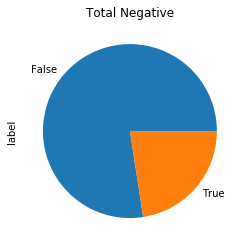

In [114]:
df.label.value_counts().plot(kind='pie', title='Total Negative')

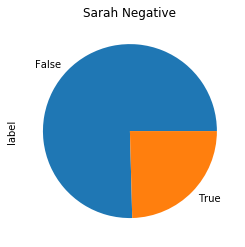

In [110]:
df[df.name=='Joe'].label.value_counts().plot(kind='pie', title='Sarah Negative')

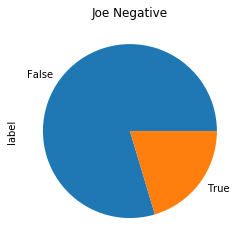

In [112]:
df[df.name=='Sarah Cook'].label.value_counts().plot(kind='pie',title='Joe Negative')